In [1]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

project_path = '/content/drive/My Drive/MSc_Thesis/'
dates_path='input_data/index/'
lr_data_path='input_data/deg/1x1/'
mr_data_path='input_data/deg/0_5x0_5/'
hr_data_path='input_data/deg/0_25x0_25/'
dem_path = 'luse_and_dem/'

In [ ]:
years = list(range(2000, 2021))

for year in years:
    hr_data = np.load(os.path.join(project_path, 'input_data/deg/0_25x0_25/', str(year)+'_t2m_sfc.npy'), allow_pickle=True)

    mr_data= np.zeros((hr_data.shape[0], 160, 290))

    for i in range(hr_data.shape[0]):
      mr_data[i] = cv2.resize(hr_data[i], (290, 160), interpolation=cv2.INTER_CUBIC)

    np.save(os.path.join(project_path, 'input_data/deg_new/0_5x0_5/', str(year)+'_t2m_sfc'), mr_data)

    lr_data= np.zeros((hr_data.shape[0], 80, 145))

    for i in range(hr_data.shape[0]):
      lr_data[i] = cv2.resize(hr_data[i], (145, 80), interpolation=cv2.INTER_CUBIC)

    np.save(os.path.join(project_path, 'input_data/deg_new/1x1/', str(year)+'_t2m_sfc'), lr_data)

In [6]:
low_res = np.load(os.path.join(project_path, lr_data_path, '2020_t2m_sfc.npy'))
medium_res = np.load(os.path.join(project_path, mr_data_path, '2020_t2m_sfc.npy'))
high_res = np.load(os.path.join(project_path, hr_data_path, '2020_t2m_sfc.npy'))

In [4]:
def plot_function(data_lr, data_mr, data_hr, title_lr, title_mr, title_hr, colormap):

  plt.figure(figsize=(20, 10))

  # Low-Resolution Image
  plt.subplot(1, 3, 1)
  plt.title(f"{title_lr} ({data_lr.shape[0]}x{data_lr.shape[1]})")
  plt.imshow(data_lr, cmap=colormap)
  # plt.colorbar()

  # Medium-Resolution Image
  plt.subplot(1, 3, 2)
  plt.title(f"{title_mr} ({data_mr.shape[0]}x{data_mr.shape[1]})")
  plt.imshow(data_mr, cmap=colormap)
  # plt.colorbar()

  # High-Resolution Image
  plt.subplot(1, 3, 3)
  plt.title(f"{title_hr} ({data_hr.shape[0]}x{data_hr.shape[1]})")
  plt.imshow(data_hr, cmap=colormap)
  # plt.colorbar()

  plt.tight_layout()  # Ensures the subplots don't overlap
  plt.show()

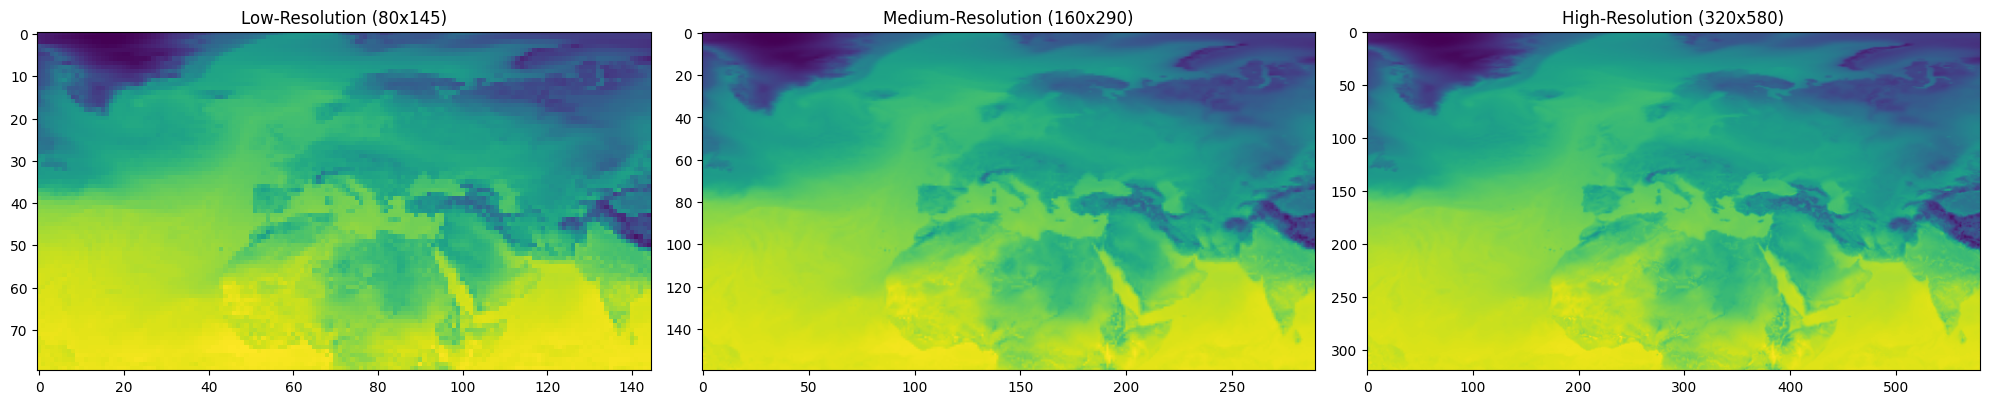

In [7]:
plot_function(low_res[100], medium_res[100], high_res[100], "Low-Resolution","Medium-Resolution", "High-Resolution", 'viridis')

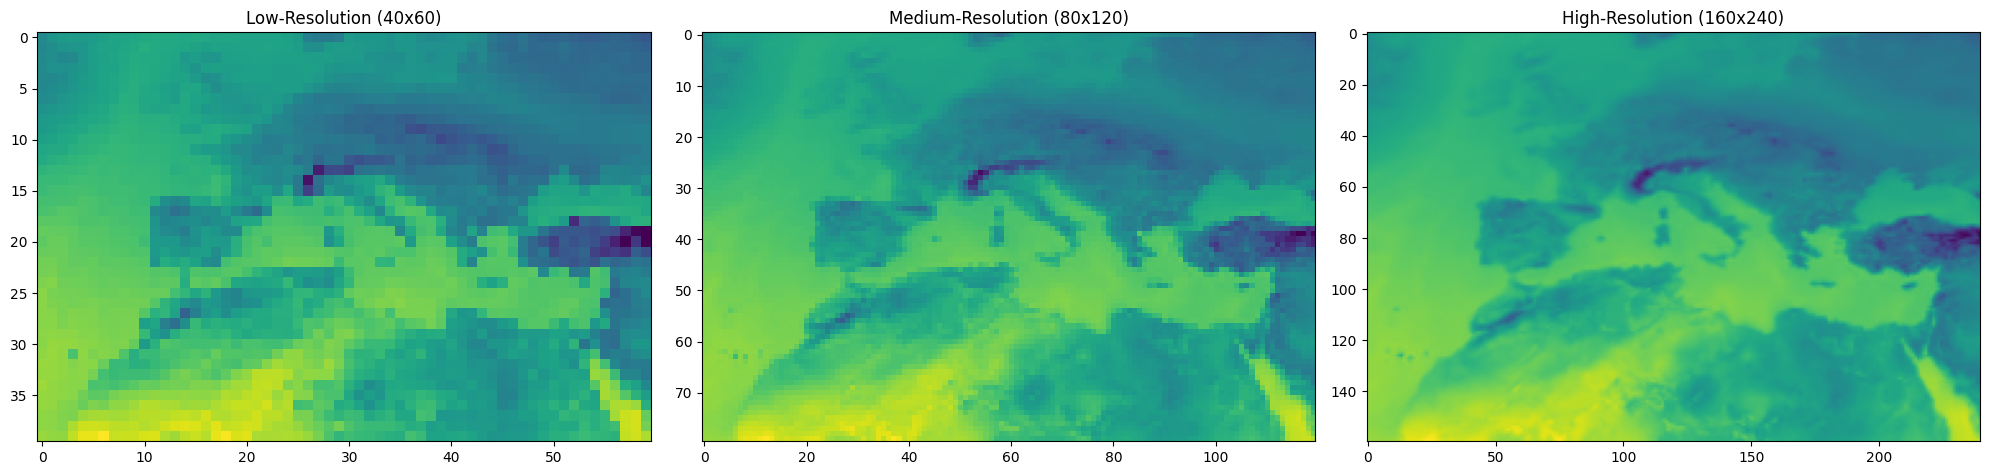

In [8]:
plot_function(low_res[100][20:60, 40:100], medium_res[100][40:120, 80:200], high_res[100][80:240, 160:400], "Low-Resolution","Medium-Resolution", "High-Resolution", 'viridis')

In [3]:
high_res_dem = np.load(project_path+dem_path+'dem.npy', allow_pickle=True)
medium_res_dem = cv2.resize(high_res_dem, (290, 160), interpolation=cv2.INTER_CUBIC)
np.save(project_path+dem_path+'dem_0_5', medium_res_dem)
low_res_dem = cv2.resize(high_res_dem, (145, 80), interpolation=cv2.INTER_CUBIC)
np.save(project_path+dem_path+'dem_1', low_res_dem)

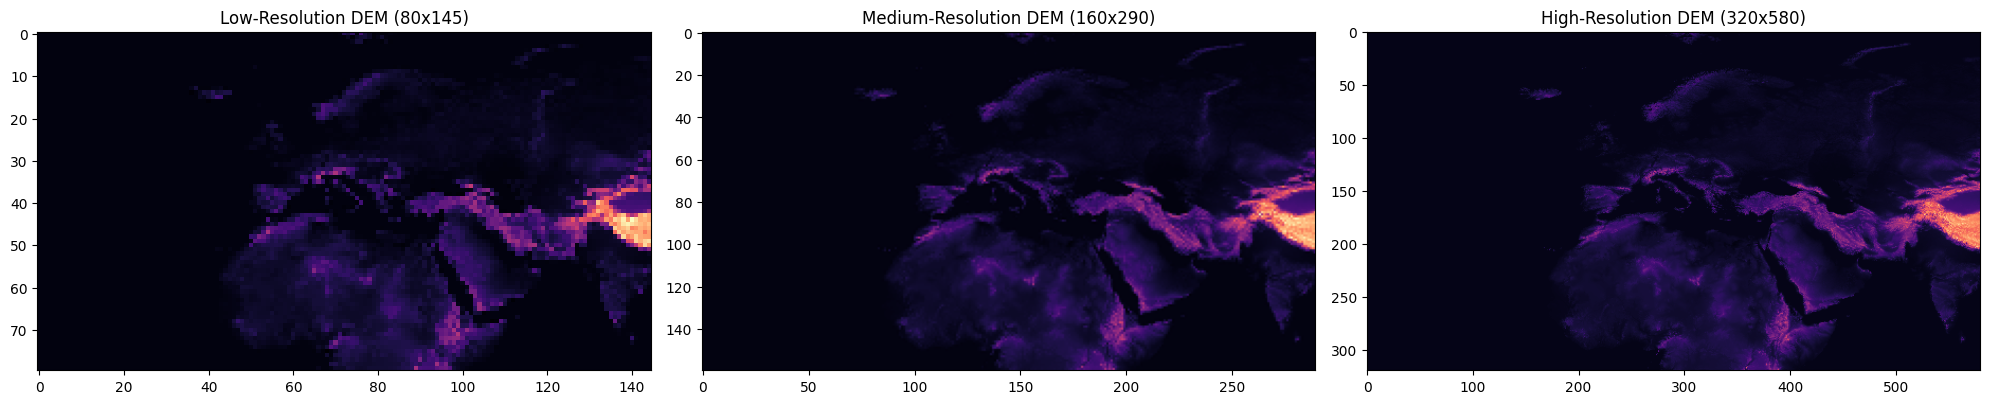

In [10]:
plot_function(low_res_dem, medium_res_dem, high_res_dem, "Low-Resolution DEM","Medium-Resolution DEM", "High-Resolution DEM", 'magma')

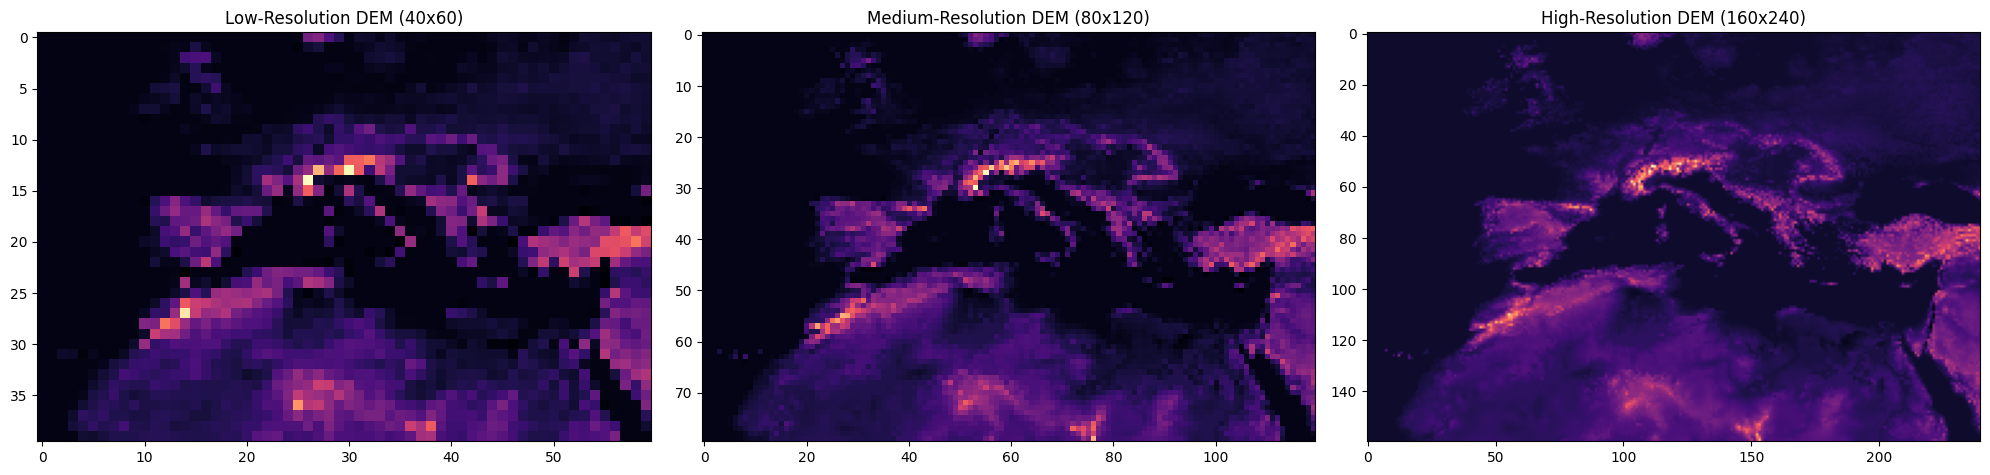

In [11]:
plot_function(low_res_dem[20:60, 40:100], medium_res_dem[40:120, 80:200], high_res_dem[80:240, 160:400], "Low-Resolution DEM","Medium-Resolution DEM", "High-Resolution DEM", 'magma')